#### TSNE and ONE CLASS SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('../creditcard.csv')

In [3]:
from sklearn.model_selection import train_test_split
data_small, data_large = train_test_split(raw_data,test_size=0.95)

In [4]:
X_train, X_test = train_test_split(data_small,test_size=0.2)

In [5]:
label_train = X_train['Class']
label_test = X_test['Class']

X_train_normal = X_train[X_train['Class'] == 0]
X_train_fraud = X_train[X_train['Class'] == 1]

X_test_normal = X_test[X_test['Class'] == 0]
X_test_fraud = X_test[X_test['Class'] == 1]

X_train_normal = X_train_normal.drop(['Class','Time'],axis=1)
X_train_fraud = X_train_fraud.drop(['Class','Time'],axis=1)
X_test_normal = X_test_normal.drop(['Class','Time'],axis=1)
X_test_fraud = X_test_fraud.drop(['Class','Time'],axis=1)
X_train = X_train.drop(['Class','Time'],axis=1)
X_test = X_test.drop(['Class','Time'],axis=1)

In [6]:
from sklearn.manifold import MDS, TSNE, SpectralEmbedding, Isomap
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import normalize

Decomp = Isomap(n_components=2).fit_transform(normalize(X_train))

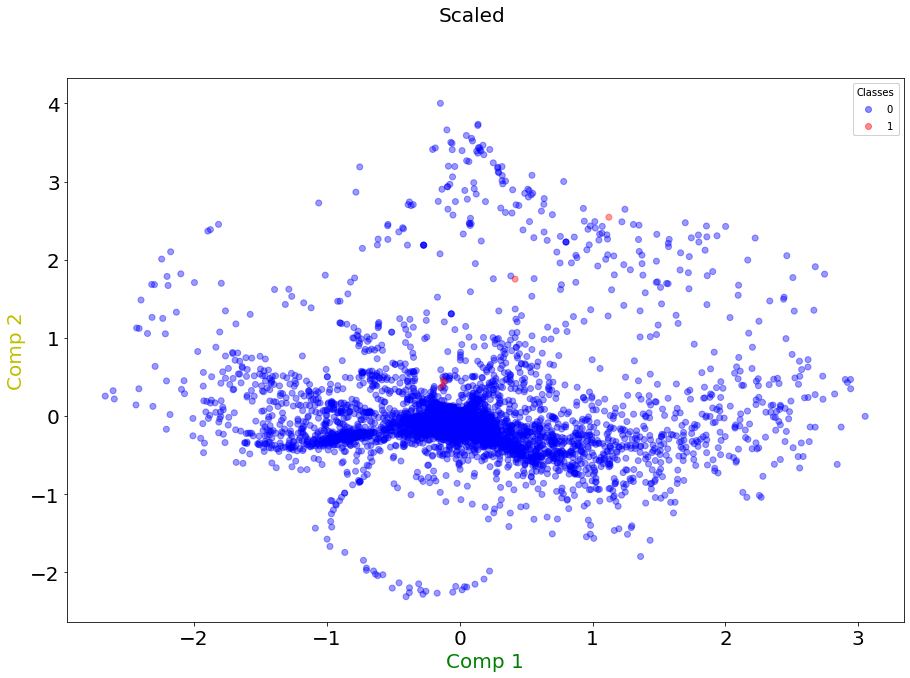

In [7]:
# Visualise
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,10))
plt.style.use(['seaborn-colorblind'])
title = fig.suptitle('Scaled', fontsize=20,)
label_x = plt.xlabel('Comp 1', fontsize=20)
label_y = plt.ylabel('Comp 2', fontsize=20)
plt.setp(title, color='black') 
plt.setp(label_x, color='g') 
plt.setp(label_y, color='y') 
scatter = ax.scatter(Decomp[:,0],Decomp[:,1],c=label_train,cmap='bwr',alpha=0.4)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [17]:
### FIT THE SVM HERE, TEST IT WITH boundaries
X_train, X_test = train_test_split(data_large,test_size=0.3)

label_train = X_train['Class']
label_test = X_test['Class']

X_train_normal = X_train[X_train['Class'] == 0]
X_train_fraud = X_train[X_train['Class'] == 1]

X_test_normal = X_test[X_test['Class'] == 0]
X_test_fraud = X_test[X_test['Class'] == 1]

X_train_normal = X_train_normal.drop(['Class','Time'],axis=1)
X_train_fraud = X_train_fraud.drop(['Class','Time'],axis=1)
X_test_normal = X_test_normal.drop(['Class','Time'],axis=1)
X_test_fraud = X_test_fraud.drop(['Class','Time'],axis=1)
X_train = X_train.drop(['Class','Time'],axis=1)
X_test = X_test.drop(['Class','Time'],axis=1)

In [18]:
from sklearn.svm import OneClassSVM
model = OneClassSVM(nu=0.01)
model.fit(X_train_normal)

y_pred_norm = model.predict(X_test_normal)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
len(y_pred_norm[y_pred_norm==1])/len(y_pred_norm)

0.9466227306947067

In [25]:
y_pred_fraud = model.predict(X_train_fraud)

In [26]:
len(y_pred_fraud[y_pred_fraud == -1]) / len(y_pred_fraud)

0.8452380952380952

In [27]:
len(y_pred_fraud[y_pred_fraud==-1])/len(y_pred_fraud)

0.8452380952380952